In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahemateja19bec1025/traffic-sign-dataset-classification")

print("Path to dataset files:", path)

100%|██████████| 190M/190M [00:02<00:00, 70.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/versions/2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the zip file name
zip_file = "/content/archive (1).zip"  # Replace with your actual zip file name

# Create a directory to extract files
extract_dir = "Emergency_vehicles"

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)

Files extracted to: Emergency_vehicles


In [ ]:
import zipfile
import os

# Define the zip file name
zip_file = "/content/archive (2).zip"  # Replace with your actual zip file name

# Create a directory to extract files
extract_dir = "traffic_signs"

# Unzip the file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Files extracted to:", extract_dir)

Files extracted to: traffic_signs


In [ ]:
import pandas as pd
df = pd.read_csv("/content/Emergency_vehicles/Emergency_Vehicles/train.csv")  # Replace with your actual file name
df.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 # open-cv used for image processing
%matplotlib inline
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
import tensorflow_hub as hub
import keras.utils as image
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_dir = "/content/Emergency_vehicles/Emergency_Vehicles/train"
test_dir = "/content/Emergency_vehicles/Emergency_Vehicles/test"

In [ ]:
pip install opencv-python

In [ ]:
image = cv2.imread(r"/content/Emergency_vehicles/Emergency_Vehicles/train/10.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

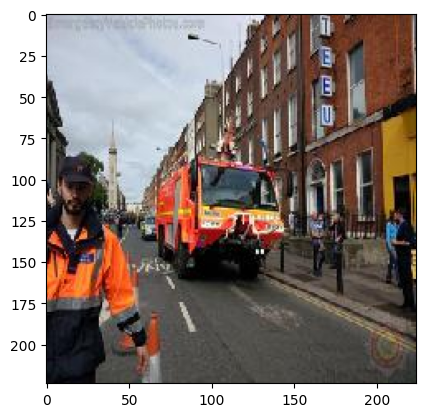

In [ ]:
plt.imshow(image)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
            rotation_range=20,# specifies the rotation to be 20%
            width_shift_range=0.1, # specifies the width shift of 10%
            height_shift_range=0.1,# specifies the height shift of 10%
            shear_range=0.20, # crops part of the image
            zoom_range=0.20, # #zooms the image by 20%
            fill_mode='nearest', # fills using the nearest pixel
            horizontal_flip=True, # Secifies the horizontal flip
            rescale=1/255 # scales the image
)


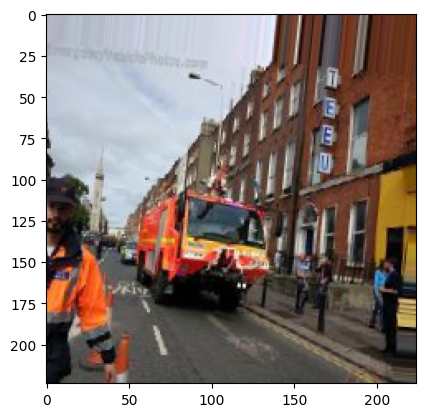

In [ ]:
plt.imshow(image_gen.random_transform(image))

In [ ]:
train_df=pd.read_csv("/content/Emergency_vehicles/Emergency_Vehicles/train.csv")
test_df=pd.read_csv("//content/Emergency_vehicles/Emergency_Vehicles/test.csv")

In [ ]:
test_df

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [ ]:
if 'emergency_or_not' in train_df.columns:
    train_df['emergency_or_not'] = train_df['emergency_or_not'].astype(str)

if 'emergency_or_not' in test_df.columns:
    test_df['emergency_or_not'] = test_df['emergency_or_not'].astype(str)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [ ]:
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150],
 directory=train_dir,
 x_col='image_names',
 y_col='emergency_or_not',
 class_mode='binary',
 target_size=(224,224),
 batch_size=50
 )
validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:],
 directory=train_dir,
 x_col='image_names',
 y_col='emergency_or_not',
 class_mode='binary',
 target_size=(224,224),
 batch_size=50
 )

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21632)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │       1,081,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,101,221 (4.20 MB)

 Trainable params: 1,101,157 (4.20 MB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
history=model.fit(train_generator,epochs = 30,validation_data = validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 115s 5s/step - accuracy: 0.6176 - loss: 0.8487 - val_accuracy: 0.4718 - val_loss: 0.7050
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.6724 - loss: 0.6450 - val_accuracy: 0.6996 - val_loss: 0.6752
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 113s 5s/step - accuracy: 0.7507 - loss: 0.5168 - val_accuracy: 0.6371 - val_loss: 0.6480
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 104s 5s/step - accuracy: 0.7159 - loss: 0.5782 - val_accuracy: 0.6210 - val_loss: 0.6438
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.7349 - loss: 0.5543 - val_accuracy: 0.7440 - val_loss: 0.6742
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - accuracy: 0.7441 - loss: 0.5027 - val_accuracy: 0.6210 - val_loss: 0.6365
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 102s 4s/step - accuracy: 0.7489 - loss: 0.5152 - val_accuracy: 0.6956 - val_loss: 0.6464
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 127s 6s/step - accuracy: 0.7577 - loss: 0.4877 - val_accuracy: 0.6431 - v

In [ ]:
test_dir_image = []
for i in tqdm(test_df.index):
    img_path = '/content/Emergency_vehicles/Emergency_Vehicles/test/' + test_df['image_names'][i]
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))
    img = np.array(img)
    test_dir_image.append(img)

test = np.array(test_dir_image)

100%|██████████| 706/706 [00:00<00:00, 808.04it/s]


In [ ]:
pred = model.predict(test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 601ms/step


In [ ]:
from tensorflow.keras.models import load_model
model.save('emergency_vehicle.h5')
model_vechile = load_model(('emergency_vehicle.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
### Traffic signs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import sys
from pathlib import Path
from PIL import Image

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import sklearn.metrics as metrics

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image

%matplotlib inline

In [ ]:
MODEL_NAME = 'ssd_mobilenet_v1_coco_11_06_2017'
MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
model_path = "./"
PATH_TO_CKPT = model_path + MODEL_NAME + '/frozen_inference_graph.pb'


def download_model():
    import six.moves.urllib as urllib
    import tarfile

    opener = urllib.request.URLopener()
    opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
    tar_file = tarfile.open(MODEL_FILE)
    for file in tar_file.getmembers():
        file_name = os.path.basename(file.name)
        if 'frozen_inference_graph.pb' in file_name:
            tar_file.extract(file, os.getcwd())

In [ ]:
def load_graph():
    if not os.path.exists(PATH_TO_CKPT):
        download_model()

    detection_graph = tf.Graph()
    with detection_graph.as_default():
        od_graph_def = tf.compat.v1.GraphDef()
        with tf.io.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')

    return detection_graph

def select_boxes(boxes, classes, scores, score_threshold=0, target_class=10):
    """

    :param boxes:
    :param classes:
    :param scores:
    :param target_class: default traffic light id in COCO dataset is 10
    :return:
    """

    sq_scores = np.squeeze(scores)
    sq_classes = np.squeeze(classes)
    sq_boxes = np.squeeze(boxes)

    sel_id = np.logical_and(sq_classes == target_class, sq_scores > score_threshold)

    return sq_boxes[sel_id]

class TLClassifier(object):
    def __init__(self):

        self.detection_graph = load_graph()
        self.extract_graph_components()
        self.sess = tf.compat.v1.Session(graph=self.detection_graph)

        # run the first session to "warm up"
        dummy_image = np.zeros((100, 100, 3))
        self.detect_multi_object(dummy_image,0.1)
        self.traffic_light_box = None
        self.classified_index = 0

    def extract_graph_components(self):
        # Definite input and output Tensors for detection_graph
        self.image_tensor = self.detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        self.detection_boxes = self.detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        self.detection_scores = self.detection_graph.get_tensor_by_name('detection_scores:0')
        self.detection_classes = self.detection_graph.get_tensor_by_name('detection_classes:0')
        self.num_detections = self.detection_graph.get_tensor_by_name('num_detections:0')


    def detect_multi_object(self, image_np, score_threshold):
        """
        Return detection boxes in a image

        :param image_np:
        :param score_threshold:
        :return:
        """

        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
        # Actual detection.

        (boxes, scores, classes, num) = self.sess.run(
            [self.detection_boxes, self.detection_scores, self.detection_classes, self.num_detections],
            feed_dict={self.image_tensor: image_np_expanded})

        sel_boxes = select_boxes(boxes=boxes, classes=classes, scores=scores,
                                 score_threshold=score_threshold, target_class=10)

        return sel_boxes


    def crop_roi_image(image_np, sel_box):
        im_height, im_width, _ = image_np.shape
        (left, right, top, bottom) = (sel_box[1] * im_width, sel_box[3] * im_width,
                                      sel_box[0] * im_height, sel_box[2] * im_height)
        cropped_image = image_np[int(top):int(bottom), int(left):int(right), :]
        return cropped_image



In [ ]:
tlc=TLClassifier()

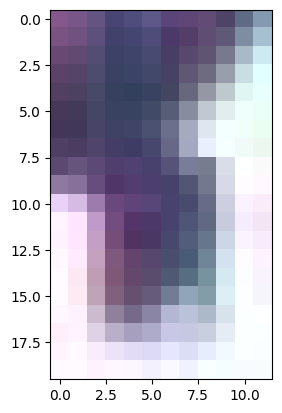

In [ ]:
test_file = "/content/traffic_signs/cropped_lisa_1/train_1/go/ds1_pic4.jpg"
im = Image.open(test_file)
image_np = np.asarray(im)
plt.imshow(image_np)

In [ ]:
import os

folder_path = "/content/traffic_signs/cropped_lisa_1/train_1/go/ds1_pic8"  # Change to your folder path
contents = os.listdir(folder_path)

print("Folder Contents:", contents)


Folder Contents: ['go', 'goLeft', 'warningLeft', 'warning', 'stopLeft', 'goForward', 'stop']


In [ ]:
IMAGE_SIZE = [224, 224]

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in inception.layers:
    layer.trainable = False

x = Flatten()(inception.output)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
train_path = '/content/traffic_signs/cropped_lisa_1/train_1'
valid_path = '/content/traffic_signs/cropped_lisa_1/val_1'

folders = glob(train_path+'/*')

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 shuffle = False)

val_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle = False)

Found 36534 images belonging to 7 classes.
Found 36534 images belonging to 7 classes.


In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

r = model.fit(
  training_set,
  validation_data=val_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
 457/1142 ━━━━━━━━━━━━━━━━━━━━ 43:51 4s/step - accuracy: 0.5678 - loss: 12.3029